# **Data Visualization Coursework**

## **Task 1**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import math 
import random

import warnings 
warnings.filterwarnings('ignore')

# color pallette 
cnf = '#393e46'
dth = '#ff2e63'
rec = '#9ACD32'
act = '#fe9801'

In [ ]:
#Importing CSV Files

Covid_Count_Details = pd.read_csv('/content/Covid_Count_Details.csv')
Covid_Count= pd.read_csv('/content/Covid_Count.csv')
Vaccination_Details=pd.read_csv('/content/Vaccination_Details.csv')
Vaccination_Count=pd.read_csv('/content/Vaccination_Count.csv')


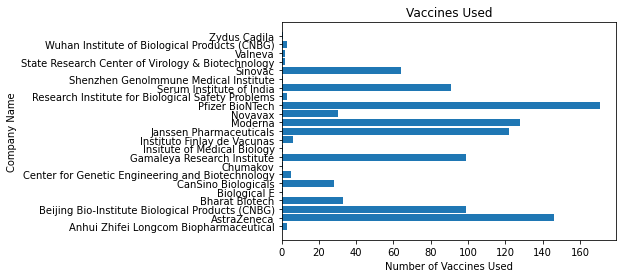

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by COMPANY_NAME and count the number of vaccines used
grouped_data = Vaccination_Details.groupby('COMPANY_NAME')['VACCINE_NAME'].count().reset_index()

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(grouped_data['COMPANY_NAME'], grouped_data['VACCINE_NAME'])

# Set axis labels and chart title
ax.set_xlabel('Number of Vaccines Used')
ax.set_ylabel('Company Name')
ax.set_title('Vaccines Used')

# Show the plot
plt.show()


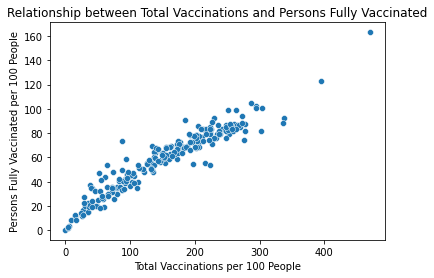

In [ ]:
import pandas as pd
import seaborn as sns



# Create a scatterplot of persons fully vaccinated per 100 versus total vaccinations per 100
sns.scatterplot(data=Vaccination_Details, x='TOTAL_VACCINATIONS_PER100', y='PERSONS_FULLY_VACCINATED_PER100')

# Set axis labels and chart title
plt.xlabel('Total Vaccinations per 100 People')
plt.ylabel('Persons Fully Vaccinated per 100 People')
plt.title('Relationship between Total Vaccinations and Persons Fully Vaccinated')

# Show the plot
plt.show()


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


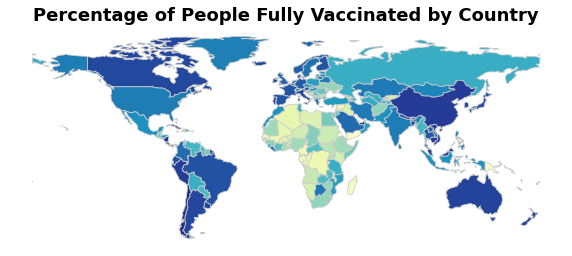

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load shapefile for country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load COVID-19 vaccination data
vaccinations = pd.read_csv('/content/Vaccination_Count.csv')

# Merge vaccination data with shapefile by country ISO3 code
merged = world.merge(vaccinations, left_on='iso_a3', right_on='ISO3')

# Calculate percentage of people fully vaccinated
merged['Percent Fully Vaccinated'] = merged['PERSONS_FULLY_VACCINATED_PER100'] / 100

# Create choropleth map
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='Percent Fully Vaccinated', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Percentage of People Fully Vaccinated by Country', fontdict={'fontsize': '18', 'fontweight' : 'bold'})
plt.show()


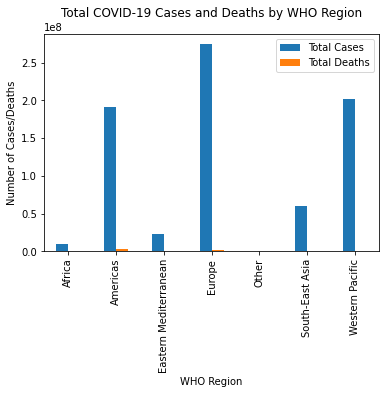

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data from the csv file
data = pd.read_csv('/content/Covid_Count_Details.csv', usecols=['Name', 'WHO Region', 'Cases - cumulative total', 'Cases - cumulative total per 100000 population', 'Cases - newly reported in last 7 days', 'Cases - newly reported in last 7 days per 100000 population', 'Cases - newly reported in last 24 hours', 'Deaths - cumulative total', 'Deaths - cumulative total per 100000 population', 'Deaths - newly reported in last 7 days', 'Deaths - newly reported in last 7 days per 100000 population', 'Deaths - newly reported in last 24 hours'])

# Group the data by WHO region and calculate the total cumulative cases and deaths for each region
region_data = data.groupby('WHO Region').sum()[['Cases - cumulative total', 'Deaths - cumulative total']]

# Create a bar chart with the total cumulative cases and deaths for each region
region_data.plot(kind='bar', rot=90)
plt.title('Total COVID-19 Cases and Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Cases/Deaths')
plt.legend(['Total Cases', 'Total Deaths'])
plt.show()
